In [2]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import re
import matplotlib.pyplot as plt

In [3]:
# Read responses
responses = list()
with open(r"G:\Data\Skype\SV02\ResponseSetUNK\filtered_response_set.txt", "r", encoding="utf-8") as f_in:
    for line in f_in:
        fields = re.split("\t", line.strip())
        responses.append(fields[2])

In [4]:
# Read response vectors
response_vector = np.genfromtxt(r"G:\Data\Skype\SV02\DebugUNK\response_vec\vectors.txt", delimiter=r' ')


Get the list of Responses close to any response

In [5]:
neigh = NearestNeighbors(3, 0.4)
neigh.fit(response_vector)

x, y = neigh.kneighbors([response_vector[0]], 10, return_distance=True)

for idx, id in enumerate(y[0]):
    print ("{}\t{}".format(responses[id], x[0][idx]))

unknownunknown	0.0
unknownunknown unknownunknown 	3.065723909734493
eureka !	3.268130024940312
plop	3.363161645425479
oy	3.3829738126996585
snicker	3.410392245639024
splat	3.474328988408538
redacted	3.49131414558296
nom	3.6406948500907506
gulp	3.7192851467759156


In [56]:
from scipy.spatial import distance

response_distance_cosine = list()
response_distance_euclidean = list()


index = 0

zero_vector = np.ones(len(response_vector[0]))

# Compute distance from Zero vector
response_distance_cosine.append(list())
response_distance_euclidean.append(list())
for idx, vec in enumerate(response_vector):
    response_distance_cosine[index].append(distance.cosine(zero_vector, response_vector[idx]))
    response_distance_euclidean[index].append(distance.euclidean(zero_vector, response_vector[idx]))

# compute distance from UNK sequence
for i in range(0,7):
    index += 1
    response_distance_cosine.append(list())
    response_distance_euclidean.append(list())
    
    for idx, vec in enumerate(response_vector):
        response_distance_cosine[index].append(distance.cosine(response_vector[index - 1], response_vector[idx]))
        response_distance_euclidean[index].append(distance.euclidean(response_vector[index - 1], response_vector[idx]))


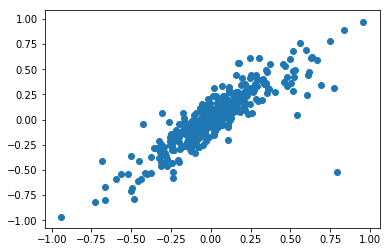

In [7]:
x = response_vector[8]
y = response_vector[12918]
plt.scatter(x,y)
plt.show()

In [8]:
neigh = NearestNeighbors(3, 0.4)
neigh.fit(response_vector)

x, y = neigh.kneighbors([response_vector[7]], 10, return_distance=True)

for idx, id in enumerate(y[0]):
    print ("{}\t{}\t{}".format(id, responses[id], x[0][idx]))

8	me too	0.0
7	me too	0.0
9	me too	0.0
1803	mee too	1.1578233282023476
15618	me also	2.179279426375703
3464	me to	2.3073877959806692
25	same here	2.7566283240736027
1583	lol me too	2.7568933403095417
16920	me same	2.763155649555833
12918	same me too	2.7872663067937076


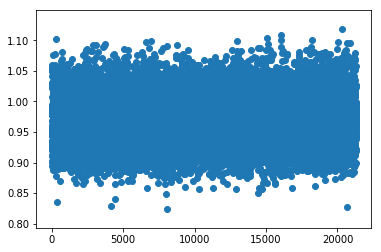

In [15]:
plt.scatter(range(len(response_distance)), response_distance)
plt.show()

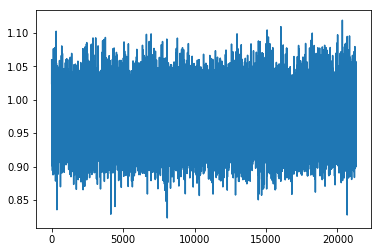

In [17]:
plt.plot(response_distance)
plt.show()

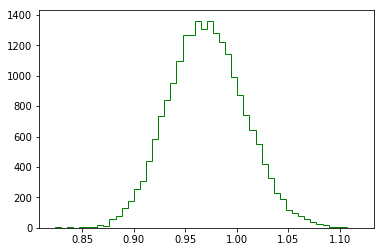

In [31]:
n, bins, pathches = plt.hist(response_distance[0], 50, color='g', histtype='step')

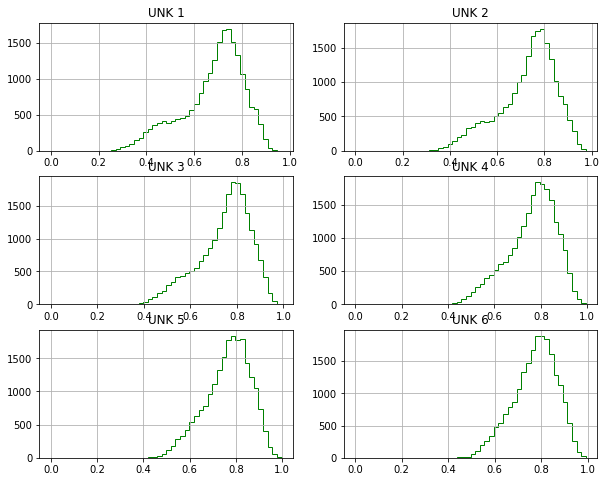

In [55]:
plt.figure(1, figsize=[10,8])

for i in range(1,7):
    plt.subplot(320+i)
    plt.title("UNK {}".format(len(re.split(r'\s+', responses[i-1].strip()))))
    plt.hist(response_distance_cosine[i], 50, color='g', histtype='step')
    plt.grid(True)

plt.show()


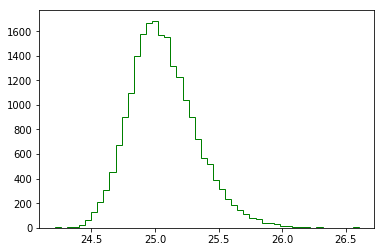

In [58]:
n, bins, pathches = plt.hist(response_distance_euclidean[0], 50, color='g', histtype='step')

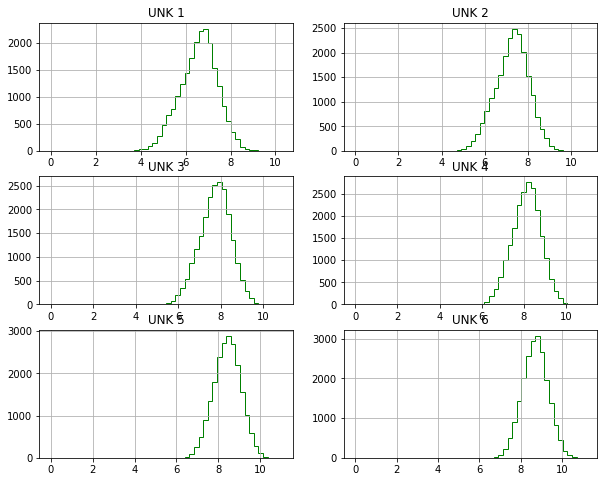

In [57]:
plt.figure(1, figsize=[10,8])

for i in range(1,7):
    plt.subplot(320+i)
    plt.title("UNK {}".format(len(re.split(r'\s+', responses[i-1].strip()))))
    plt.hist(response_distance_euclidean[i], 50, color='g', histtype='step')
    plt.grid(True)

plt.show()


In [59]:
>>>
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(response_vector)
X_embedded.shape


(21300, 2)

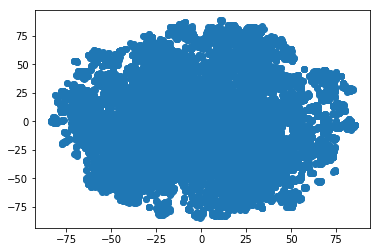

In [62]:
plt.scatter(X_embedded[:,0], X_embedded[:,1])

(array([105., 144., 133., 181., 324., 273., 342., 314., 475., 545., 420.,
        492., 512., 501., 467., 575., 592., 561., 524., 629., 507., 591.,
        682., 642., 669., 588., 642., 547., 567., 525., 522., 656., 445.,
        455., 546., 548., 515., 338., 314., 345., 357., 473., 342., 242.,
        235., 218., 228., 265., 153.,  34.]),
 array([-84.72437286, -81.25948502, -77.79459717, -74.32970932,
        -70.86482147, -67.39993362, -63.93504578, -60.47015793,
        -57.00527008, -53.54038223, -50.07549438, -46.61060654,
        -43.14571869, -39.68083084, -36.21594299, -32.75105515,
        -29.2861673 , -25.82127945, -22.3563916 , -18.89150375,
        -15.42661591, -11.96172806,  -8.49684021,  -5.03195236,
         -1.56706451,   1.89782333,   5.36271118,   8.82759903,
         12.29248688,  15.75737473,  19.22226257,  22.68715042,
         26.15203827,  29.61692612,  33.08181396,  36.54670181,
         40.01158966,  43.47647751,  46.94136536,  50.4062532 ,
         53.871141

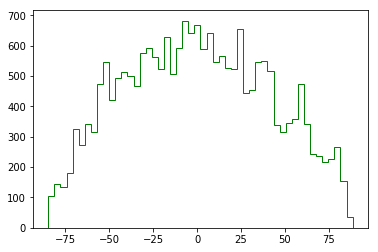

In [64]:
plt.hist(X_embedded[:,1], 50, color='g', histtype='step')

In [67]:
correlation = np.corrcoef(response_vector)

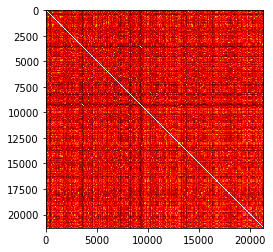

In [70]:
plt.imshow(correlation, cmap='hot', interpolation='nearest')
plt.show()

In [81]:
import scipy
np.percentile(np.reshape(correlation, (np.product(correlation.shape),)), 50)

0.2677844489424701